# NYC Neighborhood Spatial Boundaries  
Jonas

In [4]:
import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt


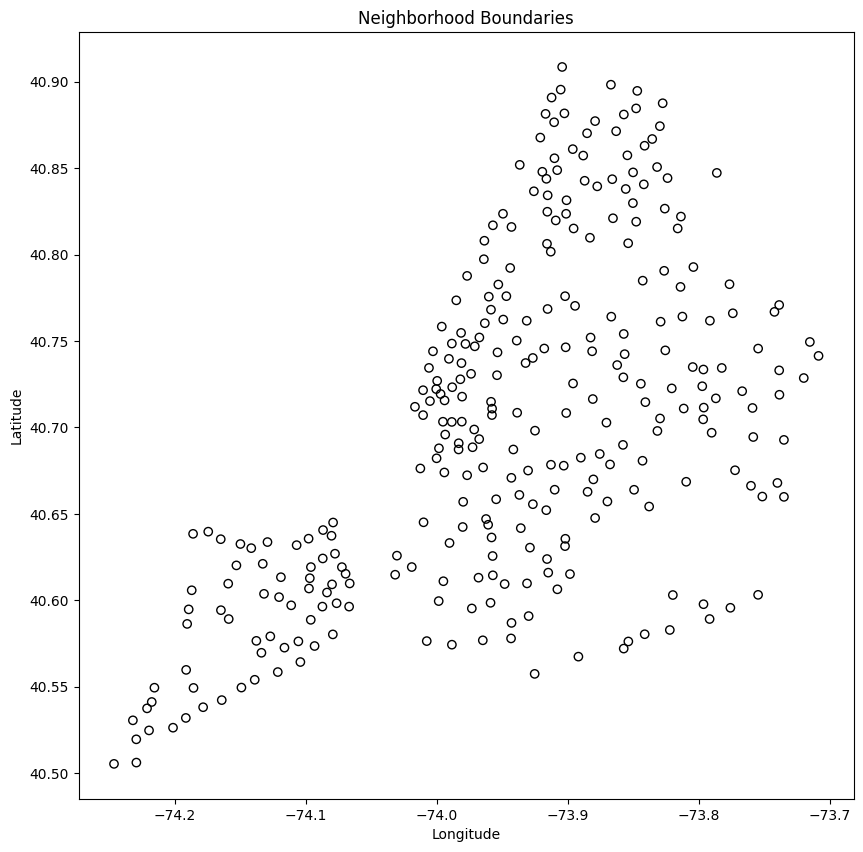

In [2]:
neighborhood = gpd.read_file('data/Neighborhood Names GIS.geojson')

fig, ax = plt.subplots(figsize=(10, 10))
neighborhood.plot(ax=ax, edgecolor="black", facecolor="none")  # Use facecolor="none" to show only boundaries
plt.title("Neighborhood Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [6]:
NTA_2020 = pd.read_csv('data/2020_NTA.csv')
NTA_2020['geometry'] = NTA_2020['the_geom'].apply(wkt.loads)
NTA_2020 = gpd.GeoDataFrame(NTA_2020, geometry='geometry')


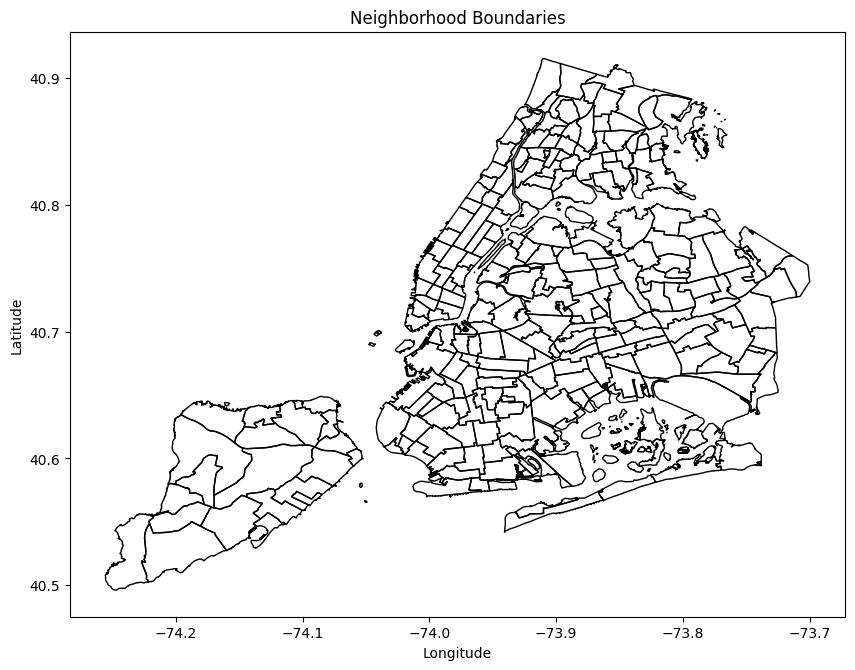

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
NTA_2020.plot(ax=ax, edgecolor="black", facecolor="none")  # Use facecolor="none" to show only boundaries
plt.title("Neighborhood Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()